In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Question 1 - Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey=pd.read_csv(r"C:\Users\moizr\Downloads\Survey.csv")
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


# Question 2 - How many samples were collected on each day?

In [3]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [4]:
survey['collection_date'].unique() #show all unique values in a column

array(['5-24-2017', '5-25-2017', '5-26-2017', '5-27-2017', '5-28-2017',
       '5-29-2017', '5-30-2017', '5-31-2017', '6-1-2017'], dtype=object)

In [5]:
survey['collection_date'].nunique() #show total no of unique values in a column

9

In [6]:
survey['collection_date'].value_counts() # to show all unique value with their count

collection_date
5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: count, dtype: int64

#### another method 

In [7]:
# Group the data by the "Date" column and count the number of samples for each day
samples_per_day = survey.groupby('collection_date').size()

In [8]:
samples_per_day

collection_date
5-24-2017    1479
5-25-2017     998
5-26-2017     598
5-27-2017     665
5-28-2017     761
5-29-2017     620
5-30-2017     582
5-31-2017     557
6-1-2017      607
dtype: int64

# Question 3 - What proportion of the total respondents were aged less than 45?

In [9]:

survey['age']=survey['age'].str.replace('24ko','24')


In [10]:
# Fill non-finite values with a default value (e.g., -1)
survey['age'] = survey['age'].fillna(-1)

# Convert the 'age' column to integer dtype
survey['age'] = survey['age'].astype(int)

In [11]:
survey['age'].value_counts()

age
25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
56      9
58      9
64      8
67      7
59      5
65      5
62      5
66      4
68      4
63      4
70      3
71      2
74      1
69      1
99      1
72      1
75      1
76      1
Name: count, dtype: int64

In [12]:
(len(survey[survey['age'] < 45])/len(survey))*100

93.18479685452162

# Question 4 - Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation.

In [13]:
data=survey.copy()

In [14]:
data.insert(10,'age_group',survey['age'])

In [15]:
(data['age_group'].unique())

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67, 65, 71,
       63, 64, 68, 69, 99, 72, 75, 76])

In [23]:
data1 = data[(data['age_group'] >= '18') & (data['age_group'] <= '25')]
data1['age_group']='25-40'

In [24]:
data2 = data[(data['age_group'] < '25') & (data['age_group'] <= '40')]
data2['age_group']='25-40'

In [25]:
data3 = data[(data['age_group'] > '40') & (data['age_group'] <= '55')]
data3['age_group']='40-55'

In [26]:
data4 = data[(data['age_group'] > '55') ]
data4['age_group']='55+'

In [27]:
data = pd.concat([data1, data2, data3,data4])
data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25-40,Male,191,Gen,0.673762
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,25-40,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,25-40,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,25-40,Male,199,Gen,0.226477
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,25-40,Male,194,BC,0.769738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,6580,5-29-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,JD(U),Fully Dissatisfied,Fully Dissatisfied,67,55+,Male,141,SC,5.308107
6702,6703,5-31-2017,Urban,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Dissatisfied,Fully Dissatisfied,68,55+,Male,146,Gen,0.710519
6720,6721,5-31-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Somewhat Satisfied,Fully Satisfied,76,55+,Male,168,Gen,1.535906
6787,6788,6-1-2017,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094


# Question 5 - How many samples were collected for each age-group? Which age-group had the most samples?


In [32]:
data['age_group'].value_counts()

age_group
25-40    4786
40-55     644
55+       108
Name: count, dtype: int64

# Question 6 - What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?


In [28]:
rjd_both = survey[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]

# Calculate the proportion of respondents who opted for RJD in both questions
(len(rjd_both) / len(survey))*100

11.810106305519149

### Question 7 - For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [43]:
cm=survey[survey['CM_satisfaction']=='Fully Satisfied']

In [51]:
a=cm.collection_date.value_counts()

In [52]:
b=survey.collection_date.value_counts()

In [84]:
c=(a/b)*100

In [85]:
proportion_satisfied_per_day = (survey[survey['CM_satisfaction'] == 'Fully Satisfied']
                                .groupby('collection_date')
                                .size() / survey.groupby('collection_date').size())

In [83]:
f=proportion_satisfied_per_day*100
f

collection_date
5-24-2017     9.871535
5-25-2017     9.519038
5-26-2017     9.866221
5-27-2017     8.120301
5-28-2017    12.089356
5-29-2017    11.774194
5-30-2017    11.168385
5-31-2017    11.131059
6-1-2017     12.355848
dtype: float64

### Question 8 - In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis

In [72]:
# proportion_dissatisfied_per_day = (survey[survey['MLA_satisfaction'] == 'Fully Dissatisfied']
#                                    .groupby('collection_date')
#                                    .size() / survey.groupby('collection_date').size())
# (proportion_dissatisfied_per_day)*100

collection_date
5-24-2017    59.972955
5-25-2017    63.126253
5-26-2017    59.030100
5-27-2017    60.601504
5-28-2017    60.709593
5-29-2017    56.451613
5-30-2017    62.027491
5-31-2017    57.630162
6-1-2017     63.426689
dtype: float64

In [67]:
# dissatisfied=survey[survey['MLA_satisfaction'] == 'Fully Dissatisfied']
# d=dissatisfied.collection_date.value_counts()
# e=survey.collection_date.value_counts()

<Axes: xlabel='collection_date'>

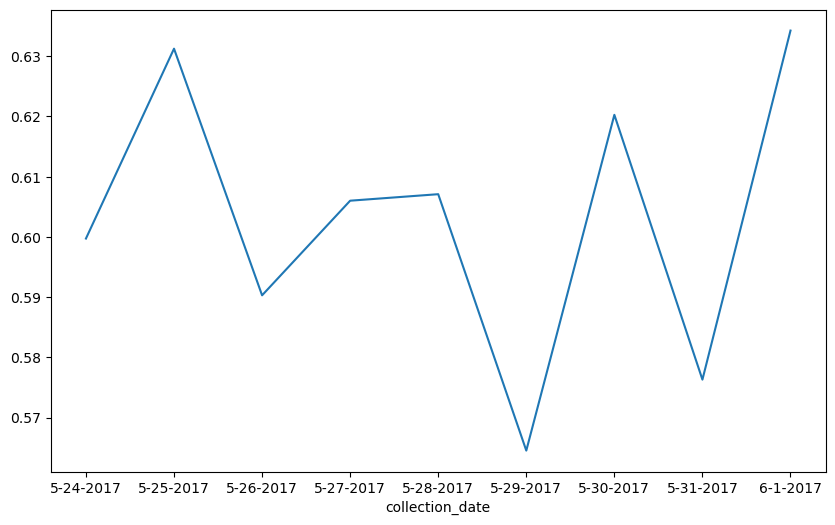

In [102]:
# Step 1: Filter the data
fully_dissatisfied_data = survey[survey['MLA_satisfaction'] == 'Fully Dissatisfied']

# Step 2: Group by collection date
grouped_data = fully_dissatisfied_data.groupby('collection_date')

# Step 3: Calculate the proportion of fully dissatisfied respondents for each day
proportions = grouped_data.size() / survey['collection_date'].value_counts()

# Step 4: Create a line plot
proportions.plot(kind='line', figsize=(10, 6))

### Question 9 - Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.
Answer - survey.pivot_table(index = 'Past_Vote', columns = 'Vote_Now', values = 'response_id', aggfunc = 'count')

In [73]:
survey.pivot_table(index='Past_Vote', columns='Vote_Now', values='response_id', aggfunc='count')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


In [74]:
pivot_table_result = survey.pivot_table(index='Past_Vote', columns='Vote_Now', values='response_id', aggfunc='count')


### Question 10 - Repeat the above question with the cell values as the sum of “weight”.

In [103]:
pivot_table_weight = pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now', values='weight', aggfunc='sum')
print(pivot_table_weight)

Vote_Now            AAP      AIMIM          BJP        BSP        HAM  \
Past_Vote                                                               
BJP            4.807335   0.349996  1049.344112   0.452551  10.171283   
BSP                 NaN   1.654731     5.174487  32.010277        NaN   
Did not vote   8.865896   5.379527   114.203906   3.329611   2.497170   
HAM            0.312607        NaN    25.348884        NaN   1.648856   
INC                 NaN  11.105958     1.642875        NaN        NaN   
JAP(L)              NaN        NaN     6.512846        NaN        NaN   
JD(U)         12.457216  29.198610   156.243100  11.005903   2.639574   
LJP                 NaN        NaN    85.010450   2.481377        NaN   
Left Front          NaN   2.298223     0.209586        NaN        NaN   
NOTA                NaN   1.061204    12.685435   0.051485        NaN   
Others        13.661335  21.212705    34.866218   0.684568   1.505864   
RJD            5.515847  24.149369    32.285093    

### Question 11 - Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [106]:
grouped_age = data.groupby('age_group').size().reset_index(name='total_samples')
print(grouped_age)

  age_group  total_samples
0     25-40           4786
1     40-55            644
2       55+            108


In [119]:
age_groupcount=data.groupby('age_group').count()

### Question 12 - Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [110]:
jd_u_count = data[data['Vote_Now'] == 'JD(U)'].groupby('age_group').size().reset_index(name='total_samples_JDU')
print(jd_u_count)


  age_group  total_samples_JDU
0     25-40                397
1     40-55                 55
2       55+                 10


In [120]:
jd_count = data[data['Vote_Now'] == 'JD(U)'].groupby('age_group').count()

In [122]:
jd_count

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
25-40,397,397,397,397,397,397,397,397,397,397,397,397,397,397
40-55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
55+,10,10,10,10,10,10,10,10,10,10,10,10,10,10


### Question 13 - Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [123]:
merged_df = pd.merge(age_groupcount, jd_count, on='age_group')
print(merged_df)

           response_id_x  collection_date_x  urban_rural_x  education_x  \
age_group                                                                 
25-40               4786               4786           4786         4786   
40-55                644                644            644          644   
55+                  108                108            108          108   

           income_x  Vote_Now_x  Past_Vote_x  CM_satisfaction_x  \
age_group                                                         
25-40          4786        4786         4786               4786   
40-55           644         644          644                644   
55+             108         108          108                108   

           MLA_satisfaction_x  age_x  ...  income_y  Vote_Now_y  Past_Vote_y  \
age_group                             ...                                      
25-40                    4786   4786  ...       397         397          397   
40-55                     644    644  ...       